# Определение перспективного тарифа для телеком-компании

## 1. Изучение общей информации

In [1]:
#импортирую библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sns
from scipy import stats as st

warnings.filterwarnings('ignore')

In [2]:
#задаю путь
path='C:/Users/dospe/Desktop/ЯПрактикум/описательная статистика/проект/'

In [3]:
#изучаю информацию методом info(), открываю первые строки таблицы calls
calls=pd.read_csv(path+'calls.csv')
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
#изучаю информацию методом info(), открываю первые строки таблицы internet
internet=pd.read_csv(path+'internet.csv')
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
#изучаю информацию методом info(), открываю первые строки таблицы messages
messages=pd.read_csv(path+'messages.csv')
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
#изучаю информацию методом info(), открываю первые строки таблицы tariffs
tariffs=pd.read_csv(path+'tariffs.csv')
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
#изучаю информацию методом info(), открываю первые строки таблицы users
users=pd.read_csv(path+'users.csv') 
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [8]:
# Определяю дубликаты в таблицах
print('Количество дубликатов в таблице calls: ', calls.duplicated().sum())
print('Количество дубликатов в таблице internet: ', internet.duplicated().sum())
print('Количество дубликатов в таблице messages: ', messages.duplicated().sum())
print('Количество дубликатов в таблице users: ', users.duplicated().sum())

Количество дубликатов в таблице calls:  0
Количество дубликатов в таблице internet:  0
Количество дубликатов в таблице messages:  0
Количество дубликатов в таблице users:  0


In [9]:
# Изучаю данные методом describe()
print('Описание таблицы calls')
calls.describe()

Описание таблицы calls


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [10]:
print('Описание таблицы internet')
internet.describe()

Описание таблицы internet


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [11]:
print('Описание таблицы users')
users.describe()

Описание таблицы users


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


### Вывод

Данные в таблицах calls, internet, messages, tariffs. полные, дубликатов нет.
В таблице internet присутствует столбец Unnamed, дублирующий индексы. Не информативный, можно удалить. 
В таблице users дубликатов нет. Пропущены данные только в колонке, содержащей дату оканчания действия тарифа. Заменять пропуски нет необходимости. В таблицах calls и internet есть строки с нулевым значением минут или Мб. Нулеые звонки - пропущенные звонки, Мб - неудачные сессии. Корректировать нулевые значения нет необходимости.

Необходимо изменить тип данных столбцов, отражающих даты событий с object на datetime.

Т.к. оператор всегда округляет каждый звонок вверх до целой минуты, необходимо округлить длительность каждого звонка.
Округление потребленного трафика вверх до Гб необходимо провести после группировки данные по пользователю и месяцу, т.к. оператор округляет потребленный трафик за месяц.

## 2. Подготовка данных

### Обработка ошибок и пропусков, замена типов данных

Данные не содержат дубликатов и необоснованных пропусков. Имеющиеся пропуски в дате закрытия тарифа означают то, что тариф действителен на дату выгрузки. По-этому, эти пропуски не заменяются и не исключаются.


Информация о звонках содержит строки с нулевым значением продолжительности.Это пропущенные звонки, корректировать эти значения не нужно. Есть информация о нулевом потреблении трафика - это нудачные сесии. Корректировать эти значения не нужно.

Изменяю тип данных с object на datetype колонок дата звонка, дата сесси в таблицах calls и internet.
Удаляю неинформативный столбец индекса из таблицы internet

In [12]:
#Удаляю столбец Unnamed: 0 из таблицы internet
internet=internet.drop('Unnamed: 0',1)

In [13]:
# меняю типы данных для полей с датами
calls['call_date']=calls['call_date'].astype('datetime64[ns]')
internet['session_date']=internet['session_date'].astype('datetime64[ns]')
messages['message_date']=messages['message_date'].astype('datetime64[ns]')

### Объединение таблиц, округление данных

In [14]:
# округляю данные о длительности звонков вверх до целой минуты
calls['duration'] = np.ceil(calls['duration'])

Для анализа информации о пользователях и  использовании минут, сообщений и трафика, необходимо создать консолиированную таблицу.

In [15]:
#Добавляю колонки Месяц в таблицу звонки
calls['month']=calls['call_date'].dt.month
internet['month']=internet['session_date'].dt.month
# группирую данные по месяцам и пользователям
calls_pivot=calls.pivot_table(index=['user_id', 'month'], aggfunc='sum')
calls_pivot['month']=calls_pivot.index.get_level_values(1)
internet_pivot=internet.pivot_table(index=['user_id', 'month'], aggfunc='sum')
internet_pivot['month']=internet_pivot.index.get_level_values(1)
internet_pivot['user_id']=internet_pivot.index.get_level_values(0)
internet_pivot=internet_pivot.reset_index(drop=True)

In [16]:
# добовляю колонку Месяц в таблицу сообщений
messages['month']=messages['message_date'].dt.month
#группирую информацию о сообщениях по пользователям и месяцам
messages_pivot=messages.pivot_table(index=['user_id', 'month'],values='id', aggfunc='count')
messages_pivot=messages_pivot.rename(columns={"id": "messages"})
messages_pivot['month']=messages_pivot.index.get_level_values(1)
messages_pivot['user_id']=messages_pivot.index.get_level_values(0)
messages_pivot=messages_pivot.reset_index(drop=True)


In [17]:
# объединяю данные о звонках, сообщениях и трафике
data=users.merge(calls_pivot, on=['user_id'], how='left')
data=data.merge(internet_pivot, on=['user_id', 'month'], how='outer')
data=data.merge(messages_pivot, on=['user_id', 'month'], how='outer')
data['gb_round'] = np.ceil((data['mb_used']/1024))
data.head()


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,duration,month,mb_used,messages,gb_round
0,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,159.0,5.0,2253.49,22.0,3.0
1,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,172.0,6.0,23233.77,60.0,23.0
2,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,340.0,7.0,14003.64,75.0,14.0
3,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,408.0,8.0,14055.93,81.0,14.0
4,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,466.0,9.0,14568.91,57.0,15.0


In [18]:
#определяю наличие пустых значений
data.isna().sum()

user_id          0
age             40
churn_date    3033
city            40
first_name      40
last_name       40
reg_date        40
tariff          40
duration        48
month            8
mb_used         19
messages       505
gb_round        19
dtype: int64

Пропуски в значениях потребленного трафика и отправленных сообщений говорит об их отсутствии для соответствующего пользователя в соответствующий месяц. Поэтому пустые значения заменяю на 0.
Среди информации о звонках есть 40 записей, у которых нет данных о пользователе. Т.к. это не большое количество, удаляю эти строки.

In [19]:
#удаляю записи
data=data[data['tariff'].isna()==False]


In [20]:
#Замена пустых значений на 0
data['duration']=data['duration'].fillna(0)
data['gb_round']=data['gb_round'].fillna(0)
data['messages']=data['messages'].fillna(0)

In [21]:
#удаляю ненужные столбцы из data
data=data.drop(['mb_used'],1) 
data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,duration,month,messages,gb_round
0,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,159.0,5.0,22.0,3.0
1,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,172.0,6.0,60.0,23.0
2,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,340.0,7.0,75.0,14.0
3,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,408.0,8.0,81.0,14.0
4,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,466.0,9.0,57.0,15.0


### Расчет дополнительных показателей

In [22]:
# Добавляю информацию о параметрах тарифов
data=data.merge(tariffs, right_on='tariff_name', left_on='tariff', how='outer')
data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,duration,month,messages,gb_round,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,159.0,5.0,22.0,3.0,1000,30720,3000,1950,150,1,1,ultra
1,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,172.0,6.0,60.0,23.0,1000,30720,3000,1950,150,1,1,ultra
2,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,340.0,7.0,75.0,14.0,1000,30720,3000,1950,150,1,1,ultra
3,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,408.0,8.0,81.0,14.0,1000,30720,3000,1950,150,1,1,ultra
4,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,466.0,9.0,57.0,15.0,1000,30720,3000,1950,150,1,1,ultra


In [23]:
#Создаю функцию, расчитывающую выручку

def profit (df):
  
    dur_over=df['duration']-df['minutes_included']
    gb_over=df['gb_round']-df['mb_per_month_included']/1024
    mes_over=df['messages']-df['messages_included']
        
    profit=df['rub_monthly_fee']+max(dur_over, 0)*df['rub_per_minute']+max(gb_over,0)*df['rub_per_gb']+max(0,mes_over)*df['rub_per_message']
    return profit
    
        
data['profit']=data.apply(profit, axis=1)    
data.style.format({'Profit': '{:.2f}'})
data['profit']=data['profit'].fillna(0)
data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,duration,month,...,gb_round,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,profit
0,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,159.0,5.0,...,3.0,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,172.0,6.0,...,23.0,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,340.0,7.0,...,14.0,1000,30720,3000,1950,150,1,1,ultra,1950.0
3,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,408.0,8.0,...,14.0,1000,30720,3000,1950,150,1,1,ultra,1950.0
4,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,466.0,9.0,...,15.0,1000,30720,3000,1950,150,1,1,ultra,1950.0


### Вывод

В рамках подготовки данных заменены типы данных столбцов, характеризующих дату событя с object на datetime, для того, чтобы в дальнейшем оперировать датами. 
Были выявлены нулевые значения в колонках длительности звонков и трафика. Это означает пропущенные звонки и неудачные сессии. Поэтому, нулевые значения были сохранены.
В соответствии с правилами тарифа, длительность каждого звонка была округлена до целых минут в большую сторону.Ежемесячный объем трафика каждого абонента также округлен в большую стороону. 
Данные о звонках, трафике и сообщениях сгруппированы по пользователю и месяцу. После группировки возникли нулевые значения длительности звонко, трафика, сообщений. Это означает, что соответствующий абонент в соответствующий месяц не использовал одну из услуг. Пустые значения заменены на 0. Рассчитаны ежемесячные значения длительности звонков, потребленного трафика и отправленных смс. К сгруппированным данным применены правила тарифа, который используется абонентом, и расcчитана ежемесячная прибыль по каждому абоненту.


## 3. Анализ данных

### Анализ и описание данных

In [24]:
# формирую выборку по тарифу ultra, описываю данные
ultra=data.query('tariff=="ultra"')
ultra.describe()

,user_id,age,duration,month,messages,gb_round,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
count,957.000000,957.000000,957.000000,951.000000,957.000000,957.000000,957.0,957.0,957.0,957.0,957.0,957.0,957.0,957.000000
mean,1264.524556,46.754441,542.031348,8.235542,48.726228,19.365726,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,2070.219436
std,140.429253,17.075861,308.978539,2.883937,46.903402,9.978743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,378.351486
min,1000.000000,18.000000,0.000000,1.000000,0.000000,0.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
25%,1148.000000,30.000000,308.000000,6.000000,5.000000,12.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
50%,1281.000000,45.000000,525.000000,9.000000,39.000000,19.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
75%,1381.000000,63.000000,756.000000,11.000000,79.000000,27.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
max,1495.000000,75.000000,1673.000000,12.000000,224.000000,49.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,4800.000000


In [25]:
# формирую выборку по тарифу smart, описываю данные
smart=data.query('tariff=="smart"')
smart.describe()

,user_id,age,duration,month,messages,gb_round,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
count,2225.000000,2225.000000,2225.000000,2223.000000,2225.000000,2225.000000,2225.0,2225.0,2225.0,2225.0,2225.0,2225.0,2225.0,2225.000000
mean,1246.069663,46.584270,418.686292,8.344130,33.366292,16.315056,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1290.225169
std,145.887390,16.358705,189.656900,2.922009,28.264460,5.770808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,819.052589
min,1001.000000,18.000000,0.000000,1.000000,0.000000,0.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
25%,1121.000000,32.000000,284.000000,6.000000,10.000000,13.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
50%,1239.000000,47.000000,422.000000,9.000000,28.000000,17.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1023.000000
75%,1376.000000,62.000000,545.000000,11.000000,51.000000,20.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1750.000000
max,1499.000000,75.000000,1435.000000,12.000000,143.000000,38.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,6770.000000


Text(0.5, 0, 'минуты')

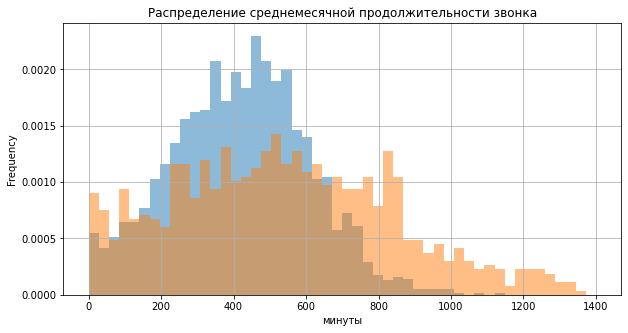

In [26]:
#построение гистограм для среднемесячной длительности звонка
ax=smart['duration'].plot(kind='hist',bins=50, range=(0, 1400), grid=True, density=True, alpha=0.5, title='Распределение среднемесячной продолжительности звонка',  figsize=(10,5))
ultra['duration'].plot(kind='hist',bins=50, range=(0, 1400), grid=True, density=True, alpha=0.5)
ax.set_ylabel("Frequency")
ax.set_xlabel("минуты")


Text(0.5, 0, 'Гб')

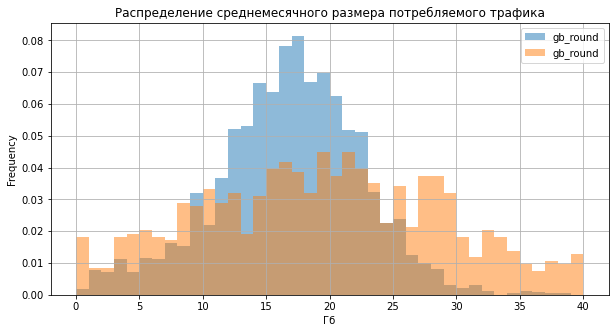

In [27]:
#построение гистограм для среднемесячного потребления траффика
ax=smart['gb_round'].plot(kind='hist',bins=40, range=(0, 40), grid=True, density=True, alpha=0.5, legend=True, title='Распределение среднемесячного размера потребляемого трафика',  figsize=(10,5))
ultra['gb_round'].plot(kind='hist',bins=40, range=(0, 40), grid=True, density=True, alpha=0.5, legend=True)
ax.set_ylabel("Frequency")
ax.set_xlabel("Гб")


Text(0.5, 0, 'кол-во')

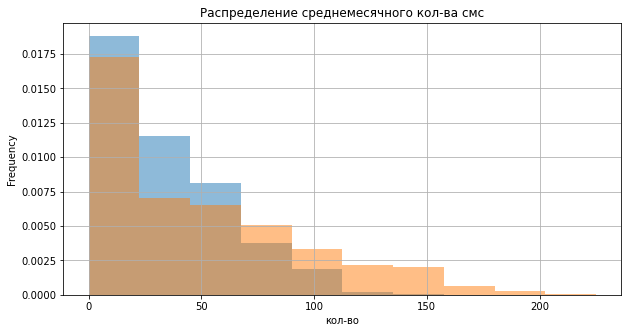

In [28]:
#построение гистограм для среднемесячного числа смс
ax=smart['messages'].plot(kind='hist',bins=10, range=(0, 225), grid=True, density=True, alpha=0.5, title='Распределение среднемесячного кол-ва смс',  figsize=(10,5))
ultra['messages'].plot(kind='hist',bins=10, range=(0, 225), grid=True, density=True, alpha=0.5)
ax.set_ylabel("Frequency")
ax.set_xlabel("кол-во")

In [29]:
# определение средних значений ежемесчного потребления услуг
smart_query_month=smart.pivot_table(index='month', values=['duration', 'gb_round', 'messages', 'profit'], aggfunc='mean')
ultra_query_month=ultra.pivot_table(index='month', values=['duration', 'gb_round', 'messages', 'profit'], aggfunc='mean')

<AxesSubplot:title={'center':'Mean monthly profit'}, xlabel='month', ylabel='profit'>

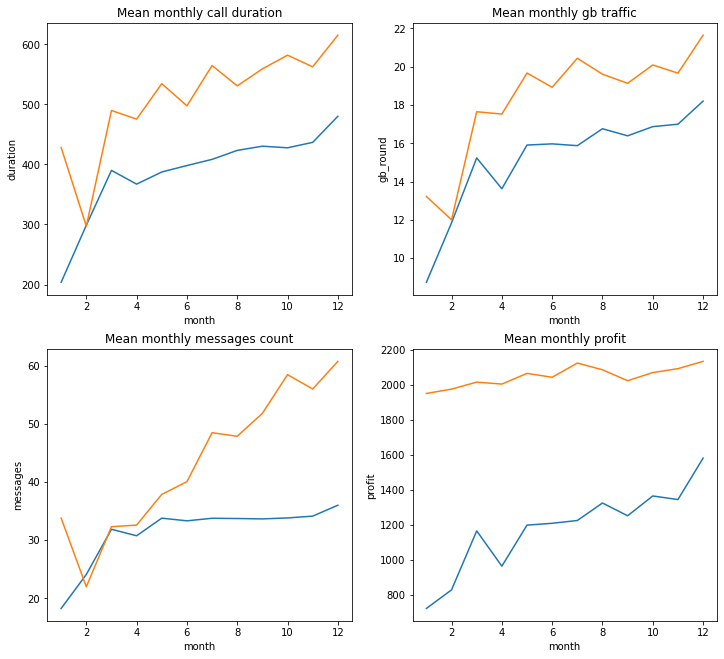

In [30]:
#строю график среднемесячных значений
fig, axes = plt.subplots(2, 2, figsize=(12,11))


sns.lineplot(data=smart_query_month, x="month", y="duration", ax=axes[0,0]).set(title='Mean monthly call duration')
sns.lineplot(data=ultra_query_month, x="month", y="duration", ax=axes[0,0])


sns.lineplot(data=smart_query_month, x="month", y="gb_round", ax=axes[0,1]).set(title='Mean monthly gb traffic')
sns.lineplot(data=ultra_query_month, x="month", y="gb_round", ax=axes[0,1])

sns.lineplot(data=smart_query_month, x="month", y="messages", ax=axes[1,0]).set(title='Mean monthly messages count')
sns.lineplot(data=ultra_query_month, x="month", y="messages", ax=axes[1,0])

#строю график среднемесячных значений
sns.lineplot(data=smart_query_month, x="month", y="profit", ax=axes[1,1]).set(title='Mean monthly profit')
sns.lineplot(data=ultra_query_month, x="month", y="profit", ax=axes[1,1])


In [31]:
# Расчет среднего, стандартного токлонения, дисперсии длительности звонка, потребленного трафика и сообщений
print()
print('Среднее знасение, стандартного отклонения и диспрерсии')
print()
data.groupby('tariff').agg({'duration':['mean', 'std', 'var'],
                            'gb_round':['mean', 'std', 'var'],
                            'messages': ['mean', 'std', 'var']}).T.astype('int')


Среднее знасение, стандартного отклонения и диспрерсии



tariff         smart  ultra
duration mean    418    542
         std     189    308
         var   35969  95467
gb_round mean     16     19
         std       5      9
         var      33     99
messages mean     33     48
         std      28     46
         var     798   2199

### Вывод

Для тарифа ультра длительность звонков обладает следующими характеристикми: максимальная длительность разговоров в месяц - 1673 минут в месяц, есть пользователи, которые не совершали звонков в некоторые месяца. Средняя продолжительность звонков в месяц- 542 мин. Медиана - 525 мин. Среднее ежемесячное значение потребленного трафика - 38 ГБ. Среднее количество отправленных сообщений - 49.

Средняя продолжительность звонков в месяц для тарифа смарт составляет 418 мин. В среднем в месяц используется 42 гб и отправляется 33 сообщений.

Распределение месячной продолжительности звонков для обоих тарифов близки к нормальному. Медианы обоих тарифов близки друг к другу. Распределение длитеьности звонков тарифа ultra имеет большее отклонение, чем отклонение тарифа smart.

Распределение потребленного трафика для обоих тарифов имеют пик при значении около 40 гб. Среднее отклонение для тарифа ultra выше чем для тарифа smart.

Распределение количества отправденных сообщений обоих тарифов имеют пик в диапазоне от 0 до 25. Для тарифа ultra среднее отклонение выше чем для тарифа smart.

## Проверка гипотез

### Проверка гипотезы о равенстве средней выручки пользователей тарифов Ультра и Смарт

Формулирую гипотезы
Н0: средние выручки пользователей обоих тарифов равны между собой
Н1: средние выручки пользователей обоих тарифов отличаются

Значение уровня значимости alpha=5%

In [32]:
#Проверка гипотезы о равенстве средних
results = st.ttest_ind(smart['profit'], ultra['profit'], equal_var = True)
print('p-значение: ',format(results.pvalue,'.15f'))


p-значение:  0.000000000000000


Т.к. p-значение ниже значения alpha, можно сделать вывод о том, что нулевая гипотеза не подтвердилась, и ее можно отвергнуть. Соответственно, может принять альтернативную гипотезу о том, что выручка пользователей разных тарифов отлична.

### Проверка гипотезы о равенстве средней выручки пользователей из Москвы и из других городов

Формулирую гипотезы
Н0: средние выручки пользователей Москвы и других регионов равны
Н1: средние выручки пользователей  Москвы и других регионов отличны

Значение уровня значимости alpha=5%

In [33]:
#Проверка гипотезы о равенстве средних
data_moscow=data.query('city=="Москва"')
data_reg=data.query('city!="Москва"')
results = st.ttest_ind(data_moscow['profit'], data_reg['profit'], equal_var = True)
print('p-значение: ',format(results.pvalue,'.15f'))

p-значение:  0.465861695827184


р-значение выше alpha, из чего следует то, что теория H0 не опровергнута. Принимаем теорию H0 о том, что средняя выручка от пользователей из Москвы и пользователей других регионов равны

## Общий вывод

Для определения тарифа, прибыльность которого выше, были изучены и проанализорованы данные 500 обонентов за 2018 год.

В ходе изучения данных было выявлено, что в данных нет дубликвтов и аномалий. Отсутствие значений в колонке, характеризующей дату окончания действия тарифа, означает, что тарифом пользуются на дату выгрузки. Нулевые значения длительности разговора означают пропущенные звонки. Нулевой потребленный трафик - неудачную сессию. В связи с тем, что пропуски и пустые значения не ошибки, нули и пропуски сохранены в датасете. 
Были изменены типы данных колонок, характеризующие даты события с object на datetime.

Информациф о длительности каждого звонка округлена до минут в большую сторону, в соответствии с тарифным планом.
Для анализа, данные были объединены в одну таблицу, и сгруппированы по паре значений пользователь-месяц. В такой группировке округлено до Гб в большую сторону значение потребленного трафика, в соответствии с тарифным планом.

Расчитан дополнительный показатель - прибыль за месяц по каждому пользователю в зависимости от тарифа и объема потребленных услуг.

Выявлено, что средняя длительность разговора, потребленных гигабайт и количества отправленных смс для пользователей тарифа ultra выше чем для пользователей тарифа smart. При этом среднее распределение этих параметров для тарифа ultra больше.

Сравнивая среднемесячную выручку по тарифам помесячно, можно сделать вывод о том, что тариф smart приносит больше прибыли, чем ultra.
С помощью ttest теория о том, что средня выручка от пользователей тарифа ultra и тарифа smart равны, отклонена. А теория о том, что выручка от пользователей из москвы и из прочих регионов равны, напротив подтверждена.

Таким образом, можно сделать вывод о том, что тариф smart приносит больше выручки, вне зависимости от того, из какого региона пользователь его использует.

